# PCA AND CLUSTERING TECHNIQUES IN PYTHON

![image](./images/3Dto2D.jpg)

The essence of PCA is to find the directions of maximum variance in high dimensional data, and project it into
a smaller dimensional space while still retaining most of the information.

<u>STEPS TO IMPLEMENT</u>

* Standardize the data
* Center the data; subtract from mean.
* Calculate covariance matrix and eigenvectors.
* Project the Principal Components in the direction of the eigenvectors

![](./images/pcaSteps.jpeg)

## PART I: Principal Component Analysis

### CODE IMPLEMENTATION

In [49]:
# Import the relevant libraries to use here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from seaborn import load_dataset
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

plt.style.use('fivethirtyeight')

Seaborn comes with a number of built-in datasets.
To get a list of all the ones that are prepackaged, use the `get_dataset_names` method.

In [26]:
print("The available datasets in Seaborn are:", end="\n")
print("*"*30, end="\n")
for data in sns.get_dataset_names():
    print(data)
    
print("*"*30)

The available datasets in Seaborn are:
******************************


anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic
******************************


> For ease of simplicity when it comes to visualization, the mpg/mtcars dataset shall be used to demonstrate PCA.

We'd also like to see how the various attributes contribute to the principal components

In [27]:
# Create the mpg dataset using the seaborn library
mpg = load_dataset(name='mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
# Get the basic information of the dataset



Let's do a little bit of exploration to understand what this dataset has.

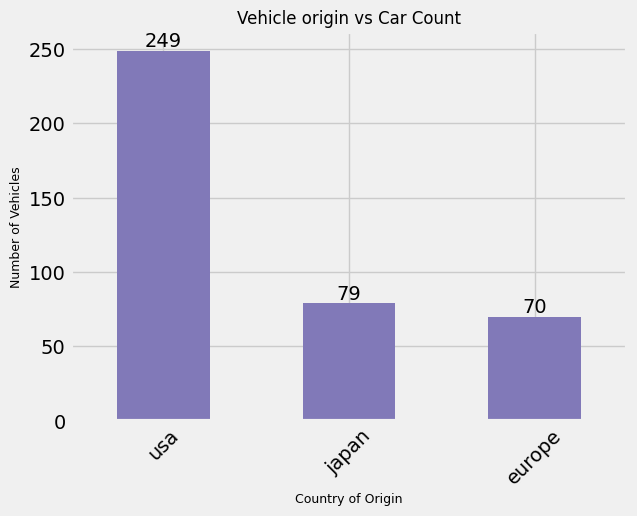

In [29]:
# How many regions does the dataset encompass?
# Visualize this
countries = mpg['origin'].value_counts().index

ax = mpg['origin'].value_counts().plot(kind='bar', color='#8179B8')
ax.set_title('Vehicle origin vs Car Count', fontsize=12)
ax.set_ylabel('Number of Vehicles', fontsize=9)
ax.set_xlabel('Country of Origin', fontsize=9)
ax.set_xticklabels(labels=countries, rotation=45)
ax.bar_label(ax.containers[0]);

> I think you'd all benefit from understanding how to add bar labels so please use [this](https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart#:~:text=As%20of%20matplotlib,in%20the%20list) for your reference.

In [30]:
# Any remarkable stats for vehicles manufactured in each region?
# Run a group by on the origin

mpg.groupby(by='origin')[['cylinders', 'horsepower', 'acceleration',
                         'weight']].mean()

,cylinders,horsepower,acceleration,weight
origin,,,,
europe,4.157143,80.558824,16.787143,2423.300000
japan,4.101266,79.835443,16.172152,2221.227848
usa,6.248996,119.048980,15.033735,3361.931727


Deductions?

In [31]:
# Uncomment and run this to see all the fonts Matplotlib Offers

# import matplotlib.font_manager
# from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

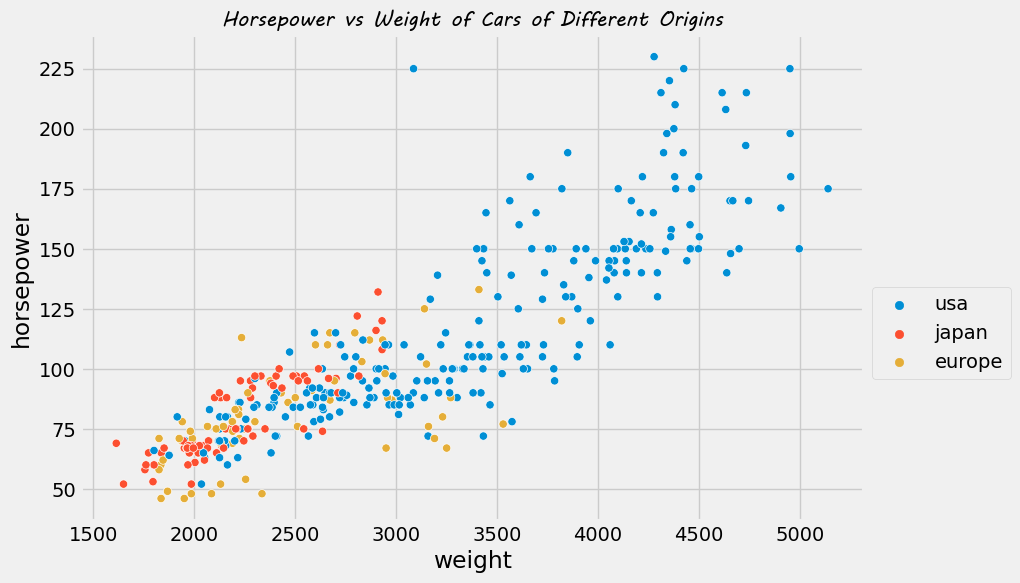

In [32]:
# Run without changes

fig, ax = plt.subplots(figsize=(9,6))
ax = sns.scatterplot(data=mpg, y='horsepower', x='weight',
                hue='origin')
ax = sns.lineplot()
ax.set_title('Horsepower vs Weight of Cars of Different Origins', fontweight='bold',
             fontsize=15, family='MV Boli')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5));

> Interpretation?

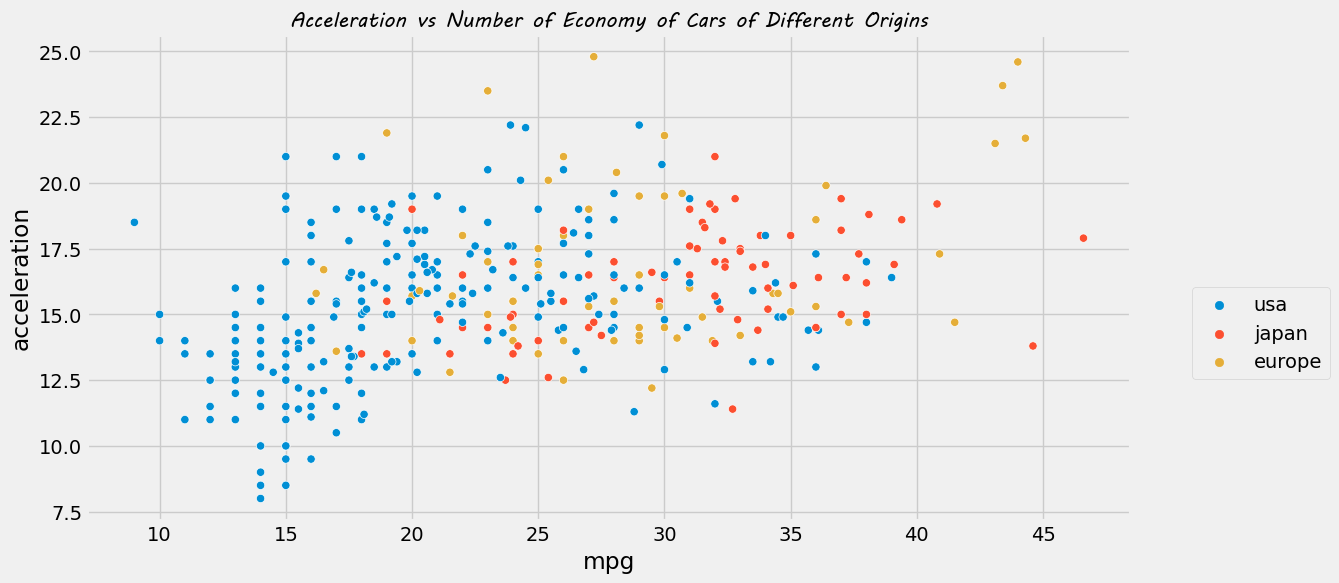

In [33]:
# Run without changes
# Acceleration vs Cylinders

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(data=mpg, y='acceleration', x='mpg',
                hue='origin', marker='o', sizes=25)
ax.set_title('Acceleration vs Number of Economy of Cars of Different Origins',
             family='MV Boli', size=15)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5));

With this basic visual exploration, is it possible to have identified some common factors within the data?

For this particular dataset, we may not have a problem with the number of features. However, I think it's a great dataset to use for these unsupervised
techniques since we can introduce row labels, and also intuitively identify patterns.

In [34]:
# Check for Null Values in the mpg dataset
mpg.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [35]:
# Display the rows with null values in the horsepower column
mpg.loc[~mpg['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


> A clever way to deal with them without affecting the data too drastically would be to impute them with regional means, i.e, 
usaHorsepowerMean and europeanHorsepowerMean.

`Mark Note`:

After running the exercise using the full dataset with 392 samples, the visual output were a mess. Instead, there is a smaller version of
the dataset included to ensure we achieve the learning goals of today's work

In [36]:
# Using a smaller version of the dataset
# Load the mtcars csv file provided and set the index 
# to be the car model
mtcars = pd.read_csv('./mtcars.csv', index_col=0)
mtcars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,origin
model,,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Japan
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Japan
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Japan
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,USA
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,USA


In [37]:
# Get the information of the dataset using appropriate methods
mtcars.info

<bound method DataFrame.info of                       mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                          
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280

In [38]:
# Standardize the mtcars dataset using only relevant columns
scaler = StandardScaler()

X = pd.read_csv('./mtcars.csv') \
    .drop(labels=['origin', 'model'],
                axis=1)
    
scaledX = scaler.fit_transform(X)

In [39]:
# Create Principal Components from the features
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(scaledX)

In [40]:
# Run without changes
# Print out a few attributes of the pca object
cumulativeVariance = np.cumsum(pca.explained_variance_ratio_)

print("The number of components produced is {}".format(pca.n_components_),
      end="\n" + "*"*30 + "\n")
print("The variance explained is as follows: \n\n{}".format(['{:.2%}'.format(x) for x in cumulativeVariance]),
      end="\n" + "*"*30 + "\n")

The number of components produced is 5
******************************
The variance explained is as follows: 

['60.08%', '84.17%', '89.87%', '92.32%', '94.36%']
******************************


From the above, it is clear even half of the principal components would be needed for any model.
However, it would be interesting to see which variables would be contributing to the first two
principal components

In [41]:
# Run without changes

pcScores = pd.DataFrame(pca.fit_transform(X)[:, 0:2],
                        columns = ['PC1', 'PC2'], index=mtcars.index)

pcScores.head()

,PC1,PC2
model,,
Mazda RX4,-79.596425,-2.132241
Mazda RX4 Wag,-79.598570,-2.147487
Datsun 710,-133.894096,5.057570
Hornet 4 Drive,8.516559,-44.985630
Hornet Sportabout,128.686342,-30.817402


In [42]:
# Run without changes
loadings = pd.DataFrame(pca.components_[:2].T, columns=['PC1', 'PC2'],
             index=X.columns)
loadings

,PC1,PC2
mpg,-0.038118,-0.009185
cyl,0.012035,0.003372
disp,0.899568,-0.435372
hp,0.434784,0.899307
drat,-0.002660,0.003900
wt,0.006239,-0.004861
qsec,-0.006671,-0.025012
vs,-0.002729,-0.002198
am,-0.001963,0.005794
gear,-0.002605,0.011272


In [43]:
# Run without changes
# Data for biplot
pc1, pc2 = pca.fit_transform(X)[:, 0], pca.fit_transform(X)[:, 1]
ldngs = pca.components_

We should also define the scaling factors scalePC1 and scalePC2 to fit the data of `PC1`, `PC2` and ldngs on the same plot. Additionally, we can define the `target group names` to label the target groups in our biplots, see features below.

In [44]:
# Run without changes

scalePC1 = 1.0/(pc1.max() - pc1.min())
scalePC2 = 1.0/(pc2.max() - pc2.min())
features = list(X.columns)

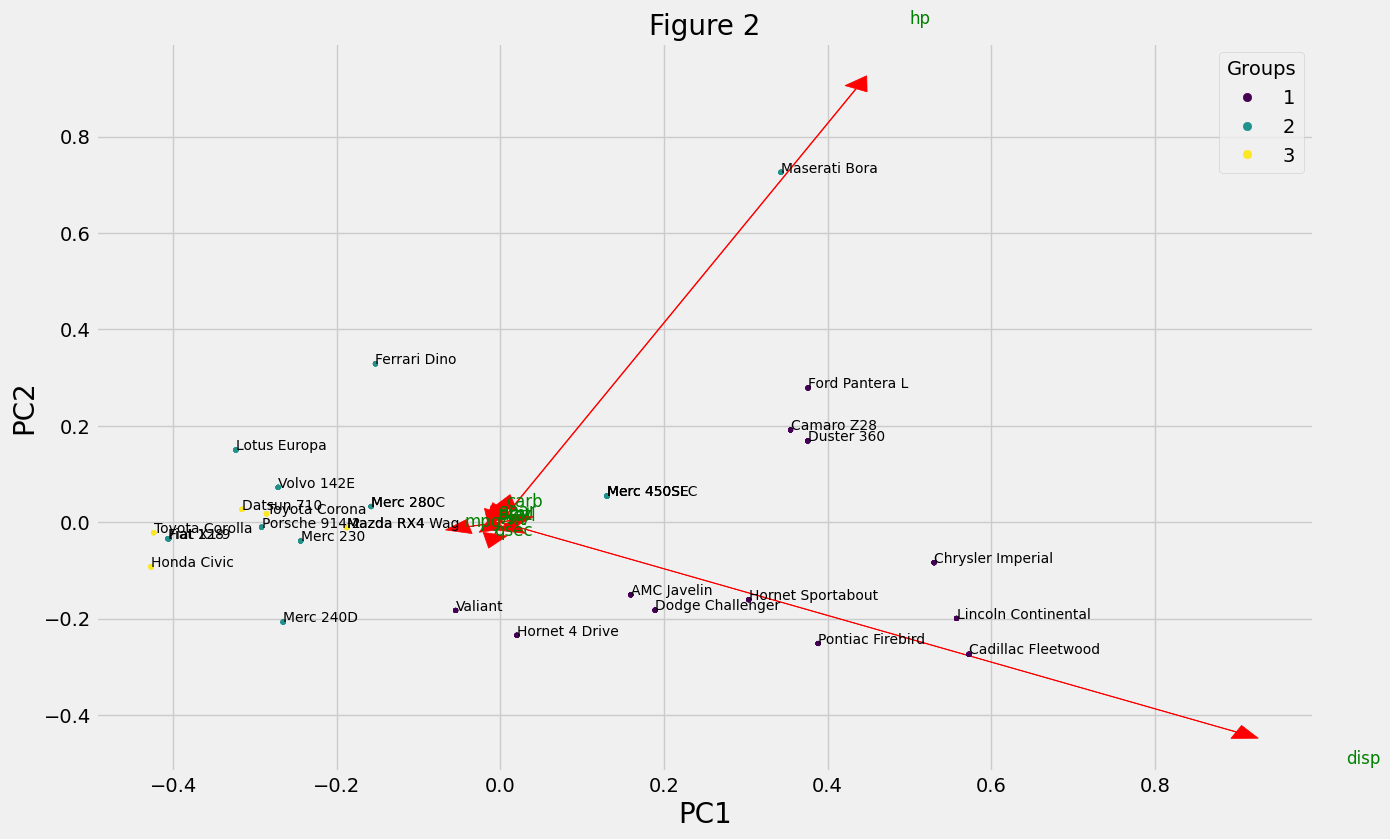

In [45]:
# Run without changes

colorMap = {'USA': 1, 'Europe': 2, 'Japan': 3}

fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], 
             head_width=0.03, 
             head_length=0.03, 
             color="red")
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature,color="green", fontsize=12)
 
    scatter = ax.scatter(pc1 * scalePC1,
                    pc2 * scalePC2, s=10,
                    c=mtcars['origin'].map(colorMap))
 
for i, label in enumerate(pcScores.index):
    ax.text(pc1[i] * scalePC1, 
            pc2[i] * scalePC2 , str(label), 
            fontsize=10)

ax.legend(*scatter.legend_elements(),
                    loc="upper right", 
                    title="Groups") 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 2', fontsize=20);

I know this is not the ideal result we needed to see. However, using a different programming language which is much more suited to such a task: R, we can produce ![this](./images/biplot)


which is much much easier to interpret. The steps taken are ideally the same as those we took with Python.



<i>Perhaps with more tweaking, the Python biplot can be tweaked to be even better.</i>

## PART II: CLUSTERING TECHNIQUES

### HIERACHICAL CLUSTERING

In [54]:
# Create a clustering using Complete linkage
# Assign it to a variable called completeClustering
completeClustering = linkage(scaledX, method='complete', metric='euclidean')

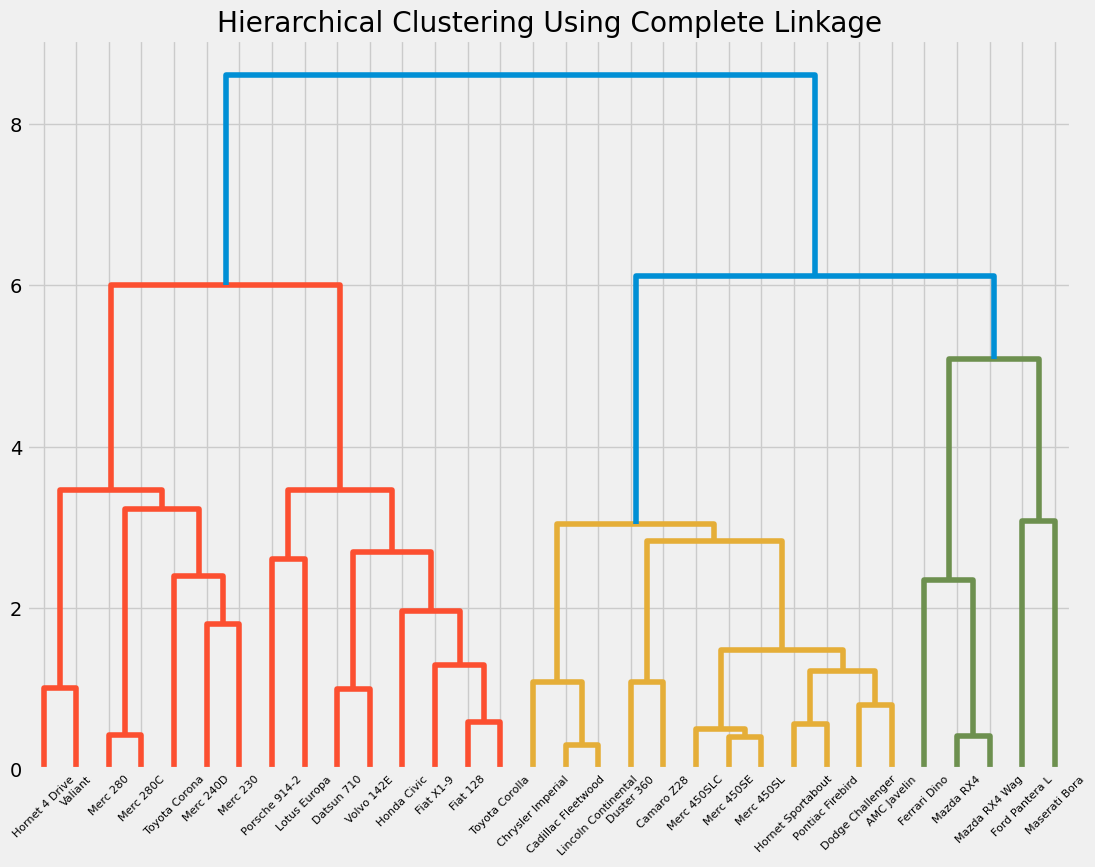

In [55]:
# Run without changes

fig, ax = plt.subplots(figsize=(12, 9))

ax = dendrogram(completeClustering, labels=mtcars.index)
plt.title('Hierarchical Clustering Using Complete Linkage')
plt.show()

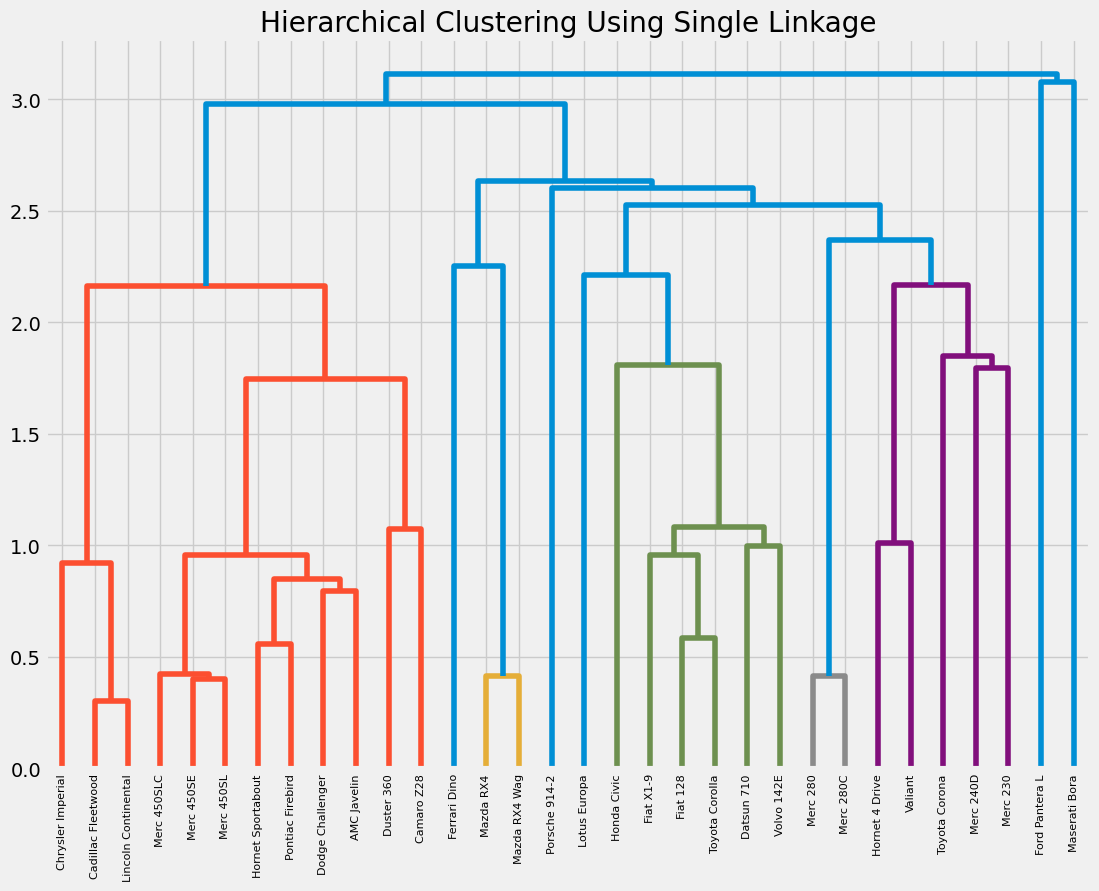

In [56]:
# Run without changes
# Using Single Linkage
singleLinkage = linkage(scaledX, method='single', metric='euclidean')

fig, ax = plt.subplots(figsize=(12, 9))

ax = dendrogram(singleLinkage, labels=mtcars.index,
                leaf_rotation=90)
plt.title('Hierarchical Clustering Using Single Linkage')
plt.show()

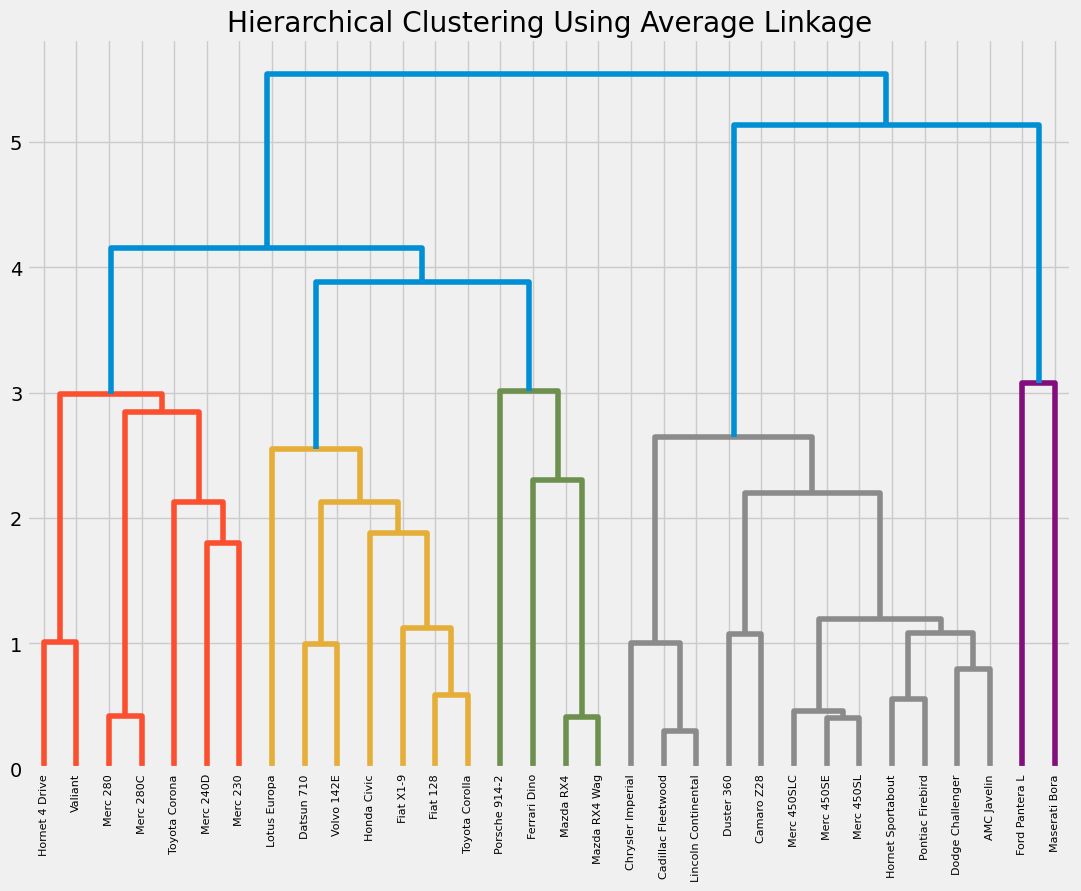

In [57]:
# Run without changes
# Using Average Linkage Method

avgLinkage = linkage(scaledX, method='average', metric='euclidean')

fig, ax = plt.subplots(figsize=(12, 9))

ax = dendrogram(avgLinkage, labels=mtcars.index,
                leaf_rotation=90)
plt.title('Hierarchical Clustering Using Average Linkage')
plt.show()

## CONCLUSION